# Модуль 1


### Загружаем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
print(f"Полностью: {df.shape}")
print(f"Кол-во строк: {df.shape[0]}")
print(f"Кол-во столбцов: {df.shape[1]}")

Полностью: (53940, 10)
Кол-во строк: 53940
Кол-во столбцов: 10


Пропусков в признаках не присутствует

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.isnull().sum()/ df.shape[0]

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

Проверим на все типы данных в признаках

In [7]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

В дальнейшим если необходимо закодировать признаки с типом данных 'object'

```
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['cut_encoder'] = le.fit_transform(df['cut'])
df['color_encoder'] = le.fit_transform(df['color'])
df['clarity_encoder'] = le.fit_transform(df['clarity'])
```



<Axes: >

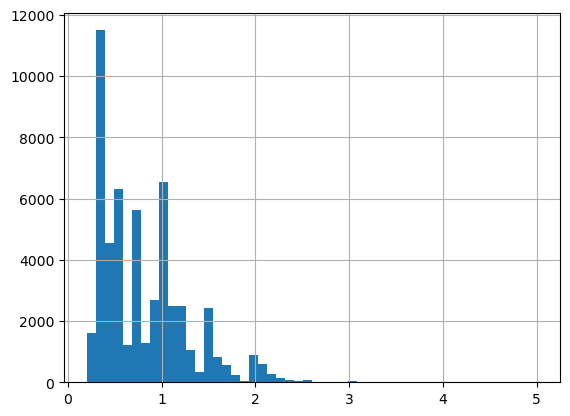

In [8]:
df['carat'].hist(bins=50)

Если необходимо сделать матрицу корреляции



```
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
```



In [9]:
df_vibros = df.describe()

df_vibros

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


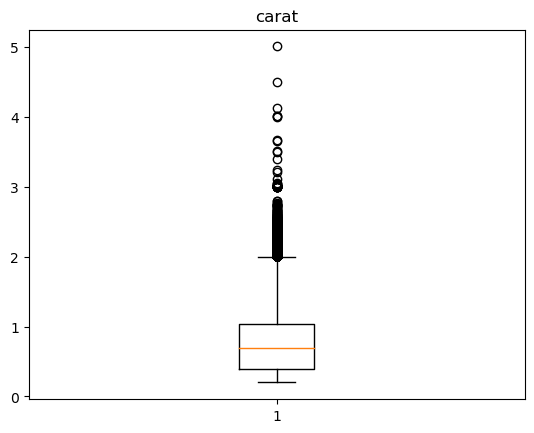

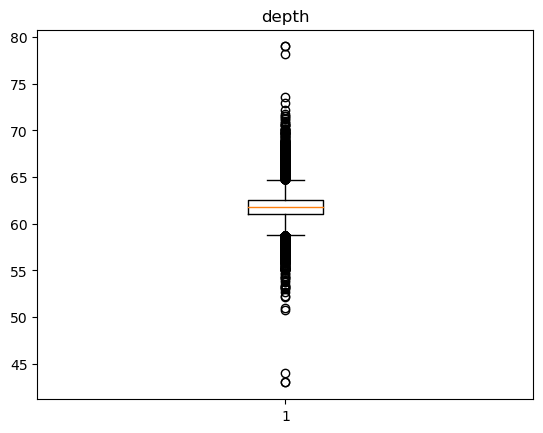

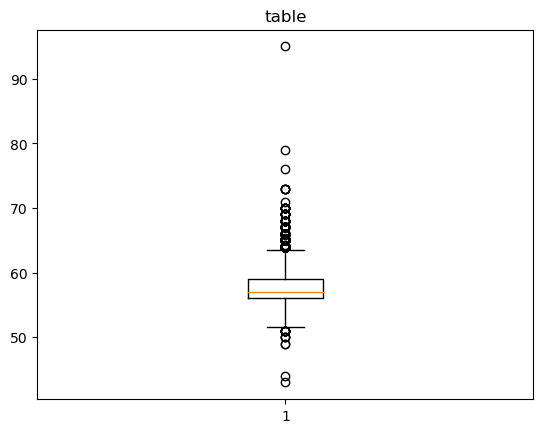

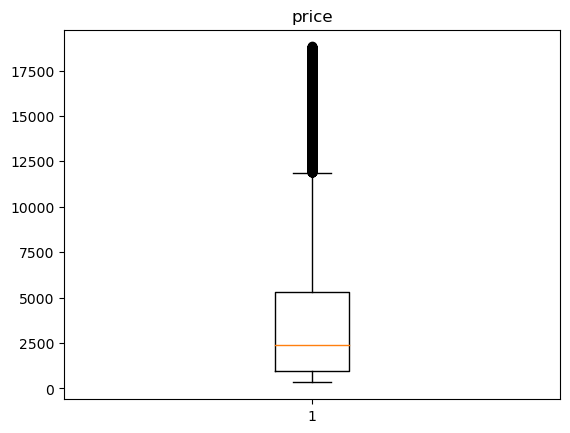

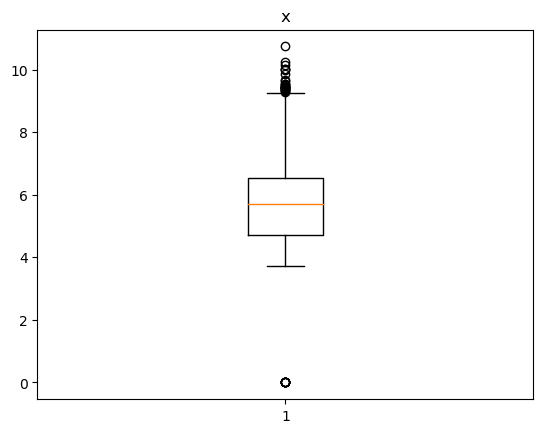

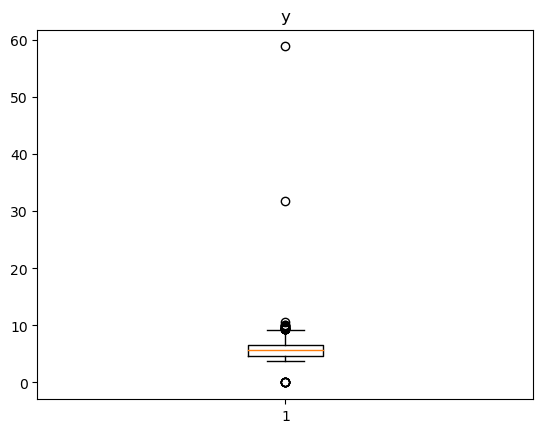

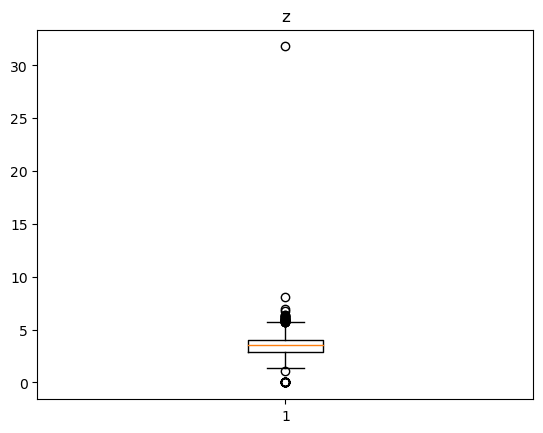

In [10]:
for i in df_vibros.columns:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

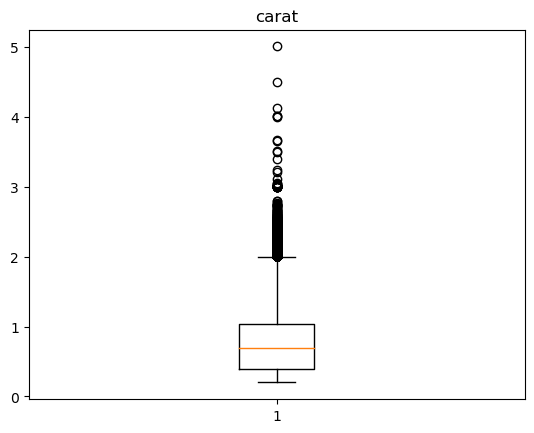

In [11]:
plt.boxplot(df['carat'])
plt.title('carat')
plt.show()

In [12]:
i = 2.0
while i < 5.01:
  print(f"Количество записей, в которых погрешность более {i}: {len(df[df['carat'] > i])}")
  i += 0.1

Количество записей, в которых погрешность более 2.0: 1889
Количество записей, в которых погрешность более 2.1: 749
Количество записей, в которых погрешность более 2.2: 462
Количество записей, в которых погрешность более 2.3000000000000003: 280
Количество записей, в которых погрешность более 2.4000000000000004: 188
Количество записей, в которых погрешность более 2.5000000000000004: 126
Количество записей, в которых погрешность более 2.6000000000000005: 67
Количество записей, в которых погрешность более 2.7000000000000006: 52
Количество записей, в которых погрешность более 2.8000000000000007: 40
Количество записей, в которых погрешность более 2.900000000000001: 40
Количество записей, в которых погрешность более 3.000000000000001: 32
Количество записей, в которых погрешность более 3.100000000000001: 14
Количество записей, в которых погрешность более 3.200000000000001: 13
Количество записей, в которых погрешность более 3.300000000000001: 11
Количество записей, в которых погрешность более 3

In [13]:
print(f"Количество записей, в которых погрешность более : {len(df[df['carat'] > 2.6])}")

Количество записей, в которых погрешность более : 67


{'whiskers': [<matplotlib.lines.Line2D at 0x25155ad9f50>,
 'caps': [<matplotlib.lines.Line2D at 0x25155adb690>,
 'boxes': [<matplotlib.lines.Line2D at 0x25155ad9350>],
 'medians': [<matplotlib.lines.Line2D at 0x25155ae8c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x25155ae9710>],
 'means': []}

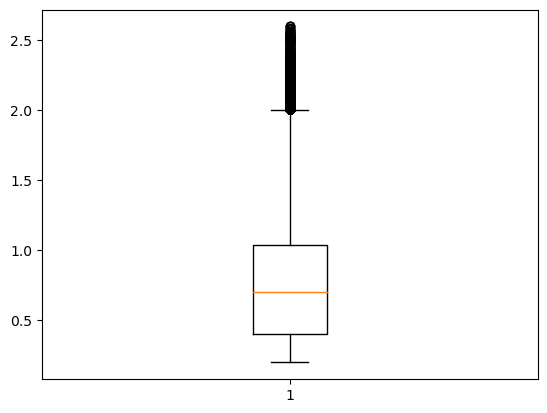

In [14]:
df.drop(index=df[df['carat'] > 2.6].index, inplace=True)
plt.boxplot(df['carat'])

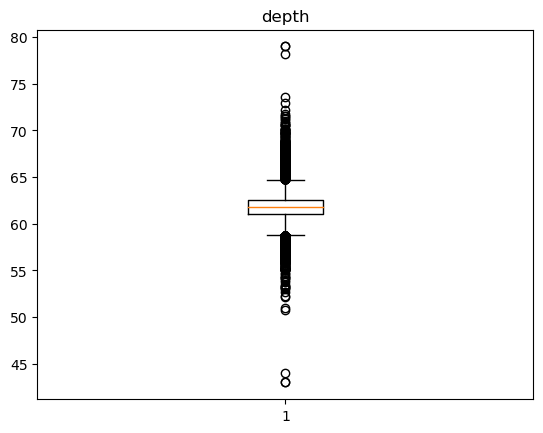

In [15]:
plt.boxplot(df['depth'])
plt.title('depth')
plt.show()

In [16]:
for i in range(71, 81, 1):
    print(f"Количество записей, в которых погрешность более {i}: {len(df[df['depth'] > i])}")

Количество записей, в которых погрешность более 71: 11
Количество записей, в которых погрешность более 72: 6
Количество записей, в которых погрешность более 73: 4
Количество записей, в которых погрешность более 74: 3
Количество записей, в которых погрешность более 75: 3
Количество записей, в которых погрешность более 76: 3
Количество записей, в которых погрешность более 77: 3
Количество записей, в которых погрешность более 78: 3
Количество записей, в которых погрешность более 79: 0
Количество записей, в которых погрешность более 80: 0


{'whiskers': [<matplotlib.lines.Line2D at 0x251554f8510>,
 'caps': [<matplotlib.lines.Line2D at 0x25155b4e8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25155b4c4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25155b4ff50>],
 'fliers': [<matplotlib.lines.Line2D at 0x25155b589d0>],
 'means': []}

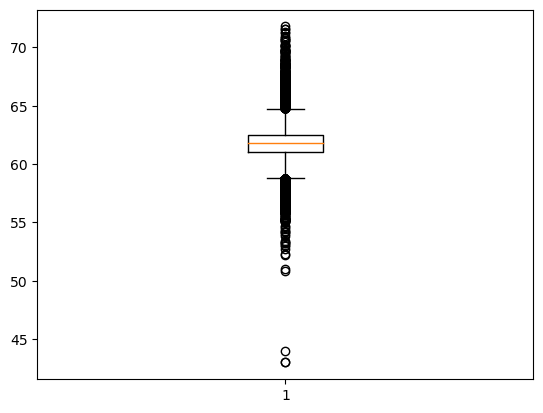

In [17]:
df.drop(index=df[df['depth'] > 72].index, inplace=True)
plt.boxplot(df['depth'])

In [18]:
for i in range(55, 40, -1):
    print(f"Количество записей, в которых погрешность более {i}: {len(df[df['depth'] < i])}")

Количество записей, в которых погрешность более 55: 22
Количество записей, в которых погрешность более 54: 15
Количество записей, в которых погрешность более 53: 8
Количество записей, в которых погрешность более 52: 5
Количество записей, в которых погрешность более 51: 4
Количество записей, в которых погрешность более 50: 3
Количество записей, в которых погрешность более 49: 3
Количество записей, в которых погрешность более 48: 3
Количество записей, в которых погрешность более 47: 3
Количество записей, в которых погрешность более 46: 3
Количество записей, в которых погрешность более 45: 3
Количество записей, в которых погрешность более 44: 2
Количество записей, в которых погрешность более 43: 0
Количество записей, в которых погрешность более 42: 0
Количество записей, в которых погрешность более 41: 0


{'whiskers': [<matplotlib.lines.Line2D at 0x25155557bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x25155561390>,
 'boxes': [<matplotlib.lines.Line2D at 0x25155556f10>],
 'medians': [<matplotlib.lines.Line2D at 0x25155562950>],
 'fliers': [<matplotlib.lines.Line2D at 0x25155563490>],
 'means': []}

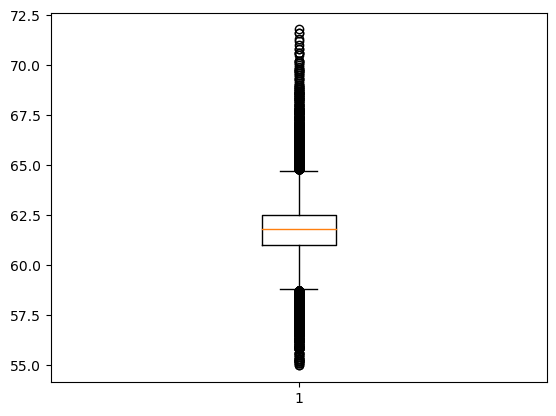

In [19]:
df.drop(index=df[df['depth'] < 55].index, inplace=True)
plt.boxplot(df['depth'])

In [20]:
for i in range(70, 73, 1):
    print(f"Количество записей, в которых погрешность более {i}: {len(df[df['depth'] > i])}")

Количество записей, в которых погрешность более 70: 17
Количество записей, в которых погрешность более 71: 5
Количество записей, в которых погрешность более 72: 0


{'whiskers': [<matplotlib.lines.Line2D at 0x251555dae90>,
 'caps': [<matplotlib.lines.Line2D at 0x251555e4690>,
 'boxes': [<matplotlib.lines.Line2D at 0x251555c5a10>],
 'medians': [<matplotlib.lines.Line2D at 0x251555e5cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x251555da2d0>],
 'means': []}

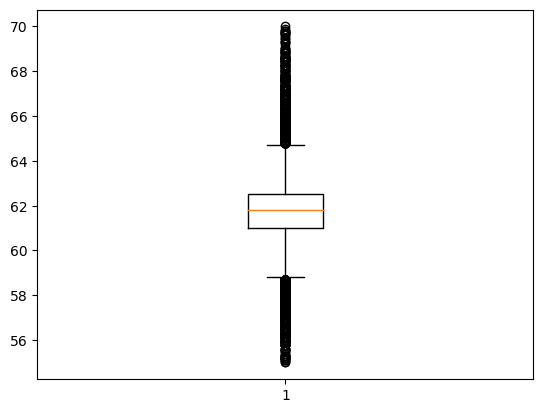

In [21]:
df.drop(index=df[df['depth'] > 70].index, inplace=True)
plt.boxplot(df['depth'])

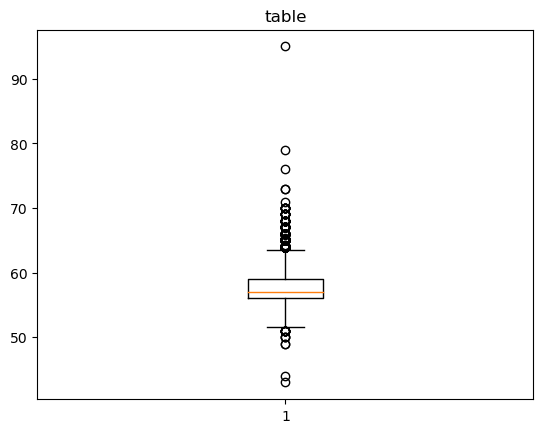

In [22]:
plt.boxplot(df['table'])
plt.title('table')
plt.show()

In [23]:
for i in range(65, 110, 1):
    print(f"Количество записей, в которых погрешность более {i}: {len(df[df['table'] > i])}")

Количество записей, в которых погрешность более 65: 175
Количество записей, в которых погрешность более 66: 83
Количество записей, в которых погрешность более 67: 44
Количество записей, в которых погрешность более 68: 23
Количество записей, в которых погрешность более 69: 14
Количество записей, в которых погрешность более 70: 6
Количество записей, в которых погрешность более 71: 5
Количество записей, в которых погрешность более 72: 5
Количество записей, в которых погрешность более 73: 3
Количество записей, в которых погрешность более 74: 3
Количество записей, в которых погрешность более 75: 3
Количество записей, в которых погрешность более 76: 2
Количество записей, в которых погрешность более 77: 2
Количество записей, в которых погрешность более 78: 2
Количество записей, в которых погрешность более 79: 1
Количество записей, в которых погрешность более 80: 1
Количество записей, в которых погрешность более 81: 1
Количество записей, в которых погрешность более 82: 1
Количество записей, в 

{'whiskers': [<matplotlib.lines.Line2D at 0x251557ebad0>,
 'caps': [<matplotlib.lines.Line2D at 0x251557f1210>,
 'boxes': [<matplotlib.lines.Line2D at 0x251557eae50>],
 'medians': [<matplotlib.lines.Line2D at 0x251557f28d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x251559c3350>],
 'means': []}

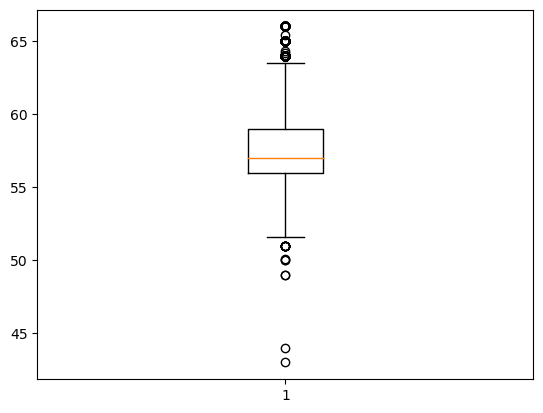

In [24]:
df.drop(index = df[df['table'] > 66].index, inplace = True)
plt.boxplot(df['table'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2515585cb10>,
 'caps': [<matplotlib.lines.Line2D at 0x2515585e2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2515584bdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2515585f9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25155860450>],
 'means': []}

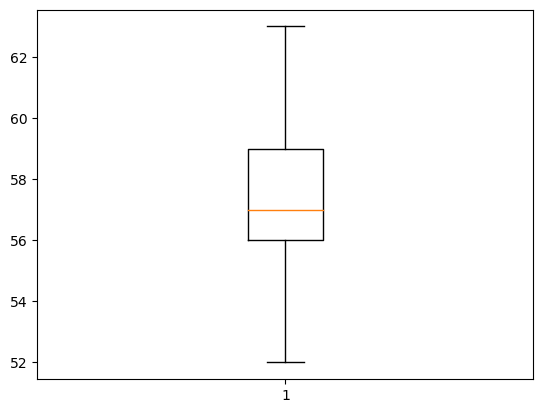

In [25]:
df.drop(index = df[df['table'] < 52].index, inplace = True)
df.drop(index = df[df['table'] > 63].index, inplace = True)
plt.boxplot(df['table'])

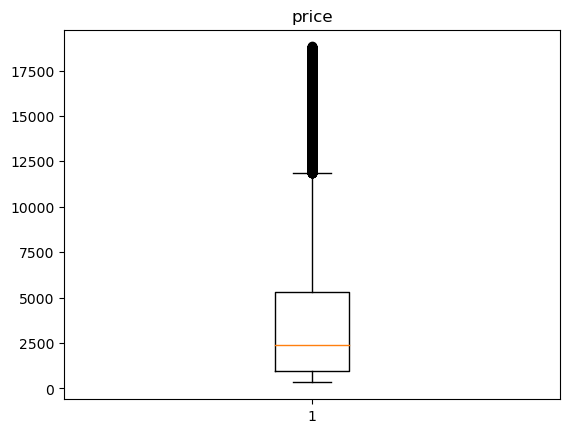

In [26]:
plt.boxplot(df['price'])
plt.title('price')
plt.show()

In [27]:
for i in range(17500, 20000, 5):
    print(f"Количество записей, в которых погрешность более {i}: {len(df[df['price'] > i])}")

Количество записей, в которых погрешность более 17500: 474
Количество записей, в которых погрешность более 17505: 473
Количество записей, в которых погрешность более 17510: 472
Количество записей, в которых погрешность более 17515: 469
Количество записей, в которых погрешность более 17520: 468
Количество записей, в которых погрешность более 17525: 464
Количество записей, в которых погрешность более 17530: 463
Количество записей, в которых погрешность более 17535: 459
Количество записей, в которых погрешность более 17540: 458
Количество записей, в которых погрешность более 17545: 457
Количество записей, в которых погрешность более 17550: 456
Количество записей, в которых погрешность более 17555: 452
Количество записей, в которых погрешность более 17560: 452
Количество записей, в которых погрешность более 17565: 452
Количество записей, в которых погрешность более 17570: 449
Количество записей, в которых погрешность более 17575: 448
Количество записей, в которых погрешность более 17580: 4

{'whiskers': [<matplotlib.lines.Line2D at 0x25155926350>,
 'caps': [<matplotlib.lines.Line2D at 0x25155927710>,
 'boxes': [<matplotlib.lines.Line2D at 0x251559259d0>],
 'medians': [<matplotlib.lines.Line2D at 0x251559349d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25155927510>],
 'means': []}

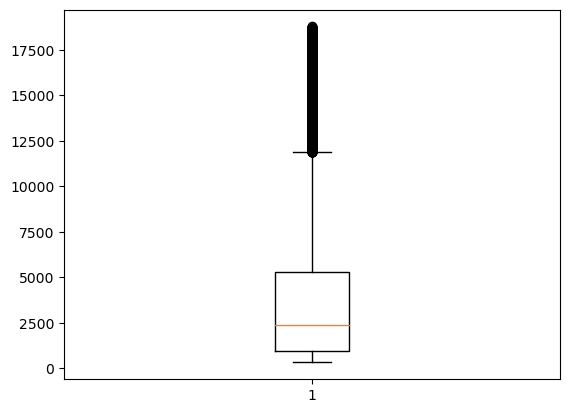

In [28]:
df.drop(index = df[df['price'] > 18790].index, inplace = True)
plt.boxplot(df['price'])

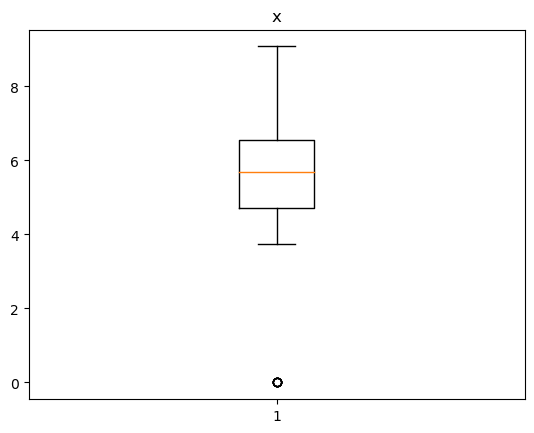

In [29]:
plt.boxplot(df['x'])
plt.title('x')
plt.show()

In [30]:
for i in range(0, 2, 1):
    print(f"Количество записей, в которых погрешность более {i}: {len(df[df['x'] > i])}")

Количество записей, в которых погрешность более 0: 53218
Количество записей, в которых погрешность более 1: 53218


{'whiskers': [<matplotlib.lines.Line2D at 0x25155c04c90>,
 'caps': [<matplotlib.lines.Line2D at 0x25155c06410>,
 'boxes': [<matplotlib.lines.Line2D at 0x25155c04090>],
 'medians': [<matplotlib.lines.Line2D at 0x25155c079d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25155bfbe90>],
 'means': []}

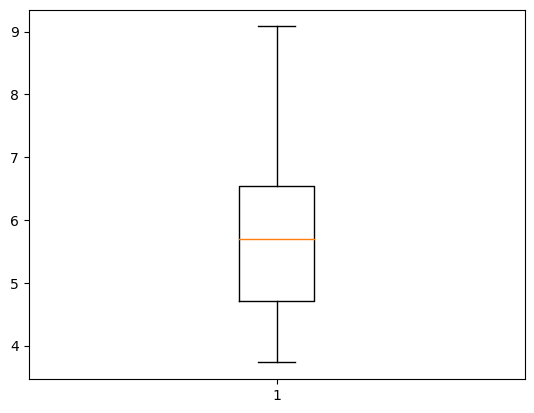

In [31]:
df.drop(index = df[df['x'] < 1].index, inplace = True)
plt.boxplot(df['x'])

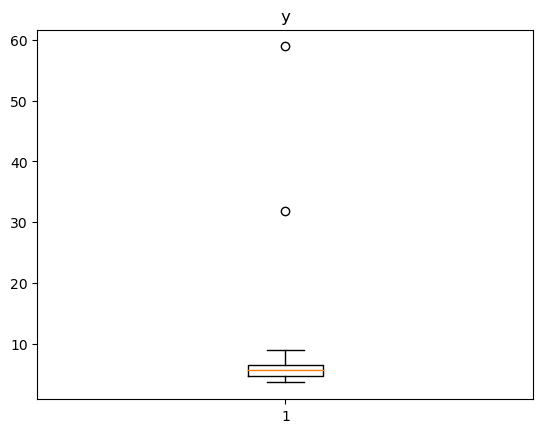

In [32]:
plt.boxplot(df['y'])
plt.title('y')
plt.show()

In [33]:
for i in range(30, 65, 1):
    print(f"Количество записей, в которых погрешность более {i}: {len(df[df['y'] > i])}")

Количество записей, в которых погрешность более 30: 2
Количество записей, в которых погрешность более 31: 2
Количество записей, в которых погрешность более 32: 1
Количество записей, в которых погрешность более 33: 1
Количество записей, в которых погрешность более 34: 1
Количество записей, в которых погрешность более 35: 1
Количество записей, в которых погрешность более 36: 1
Количество записей, в которых погрешность более 37: 1
Количество записей, в которых погрешность более 38: 1
Количество записей, в которых погрешность более 39: 1
Количество записей, в которых погрешность более 40: 1
Количество записей, в которых погрешность более 41: 1
Количество записей, в которых погрешность более 42: 1
Количество записей, в которых погрешность более 43: 1
Количество записей, в которых погрешность более 44: 1
Количество записей, в которых погрешность более 45: 1
Количество записей, в которых погрешность более 46: 1
Количество записей, в которых погрешность более 47: 1
Количество записей, в которы

{'whiskers': [<matplotlib.lines.Line2D at 0x25156e226d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25156e23f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x25156e21a50>],
 'medians': [<matplotlib.lines.Line2D at 0x25156e314d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25156e31ed0>],
 'means': []}

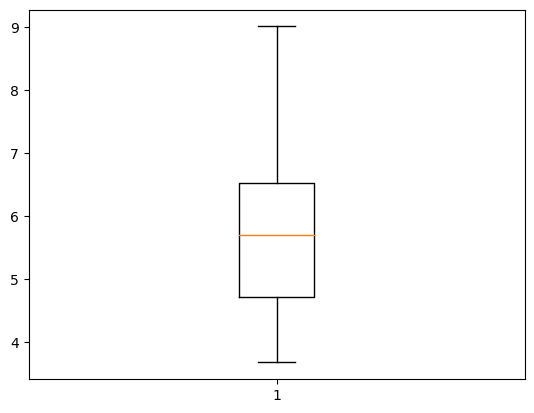

In [34]:
df.drop(index = df[df['y'] > 30].index, inplace = True)
plt.boxplot(df['y'])

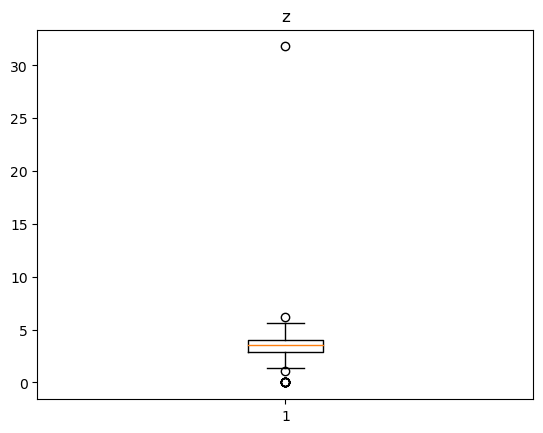

In [35]:
plt.boxplot(df['z'])
plt.title('z')
plt.show()

In [36]:
i = -2.0
while i < 5.0:
  print(f"Количество записей, в которых погрешность более {i}: {len(df[df['carat'] > i])}")
  i += 0.1

Количество записей, в которых погрешность более -2.0: 53216
Количество записей, в которых погрешность более -1.9: 53216
Количество записей, в которых погрешность более -1.7999999999999998: 53216
Количество записей, в которых погрешность более -1.6999999999999997: 53216
Количество записей, в которых погрешность более -1.5999999999999996: 53216
Количество записей, в которых погрешность более -1.4999999999999996: 53216
Количество записей, в которых погрешность более -1.3999999999999995: 53216
Количество записей, в которых погрешность более -1.2999999999999994: 53216
Количество записей, в которых погрешность более -1.1999999999999993: 53216
Количество записей, в которых погрешность более -1.0999999999999992: 53216
Количество записей, в которых погрешность более -0.9999999999999992: 53216
Количество записей, в которых погрешность более -0.8999999999999992: 53216
Количество записей, в которых погрешность более -0.7999999999999993: 53216
Количество записей, в которых погрешность более -0.6999

{'whiskers': [<matplotlib.lines.Line2D at 0x25156e83750>,
 'caps': [<matplotlib.lines.Line2D at 0x25156e5dcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25156e80e90>],
 'medians': [<matplotlib.lines.Line2D at 0x25156e5ca10>],
 'fliers': [<matplotlib.lines.Line2D at 0x25156e96ad0>],
 'means': []}

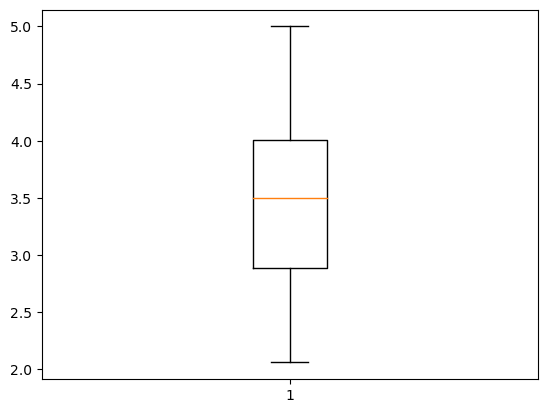

In [37]:
df.drop(index = df[df['z'] < 2].index, inplace = True)
df.drop(index = df[df['z'] > 5].index, inplace = True)
plt.boxplot(df['z'])

In [38]:
print(f"Полностью: {df.shape}")
print(f"Кол-во строк: {df.shape[0]}")
print(f"Кол-во столбцов: {df.shape[1]}")

Полностью: (51832, 10)
Кол-во строк: 51832
Кол-во столбцов: 10


In [39]:
for col in df.columns:
  if len(df[col].unique()) <= 2:
     print(f"{col} имеет только {len(df[col].unique())} значения")

## Кодировка информации

In [40]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [41]:
df.head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
cut_list = list(df['cut'])
cut_code =[]
for i in cut_list:
    if i == 'Fair':
        cut_code.append(int(0))
    elif i == 'Good':
        cut_code.append(int(1))
    elif i == 'Very Good':
        cut_code.append(int(2))
    elif i == 'Premium':
        cut_code.append(int(3))
    elif i == 'Ideal':
        cut_code.append(int(4))
df['cut'] = cut_code
df.head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51832 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    51832 non-null  float64
 1   cut      51832 non-null  int64  
 2   color    51832 non-null  object 
 3   clarity  51832 non-null  object 
 4   depth    51832 non-null  float64
 5   table    51832 non-null  float64
 6   price    51832 non-null  int64  
 7   x        51832 non-null  float64
 8   y        51832 non-null  float64
 9   z        51832 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 4.3+ MB


In [44]:
clar_list = list(df['clarity'])
clar_code =[]
for i in clar_list:
    if i == 'I1':
        clar_code.append(int(0))
    elif i == 'SI2':
        clar_code.append(int(1))
    elif i == 'SI1':
        clar_code.append(int(2))
    elif i == 'VS2':
        clar_code.append(int(3))
    elif i == 'VS1':
        clar_code.append(int(4))
    elif i == 'VVS2':
        clar_code.append(int(5))
    elif i == 'VVS1':
        clar_code.append(int(6))
    elif i == 'IF':
        clar_code.append(int(7))
df['clarity']=clar_code

In [45]:
df = pd.get_dummies(df,columns=['color'])
df.head(4)

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4,1,61.5,55.0,326,3.95,3.98,2.43,False,True,False,False,False,False,False
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,False,True,False,False,False,False,False
3,0.29,3,3,62.4,58.0,334,4.20,4.23,2.63,False,False,False,False,False,True,False
4,0.31,1,1,63.3,58.0,335,4.34,4.35,2.75,False,False,False,False,False,False,True


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51832 entries, 0 to 53939
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    51832 non-null  float64
 1   cut      51832 non-null  int64  
 2   clarity  51832 non-null  int64  
 3   depth    51832 non-null  float64
 4   table    51832 non-null  float64
 5   price    51832 non-null  int64  
 6   x        51832 non-null  float64
 7   y        51832 non-null  float64
 8   z        51832 non-null  float64
 9   color_D  51832 non-null  bool   
 10  color_E  51832 non-null  bool   
 11  color_F  51832 non-null  bool   
 12  color_G  51832 non-null  bool   
 13  color_H  51832 non-null  bool   
 14  color_I  51832 non-null  bool   
 15  color_J  51832 non-null  bool   
dtypes: bool(7), float64(6), int64(3)
memory usage: 4.3 MB


## Визуализация

<Axes: >

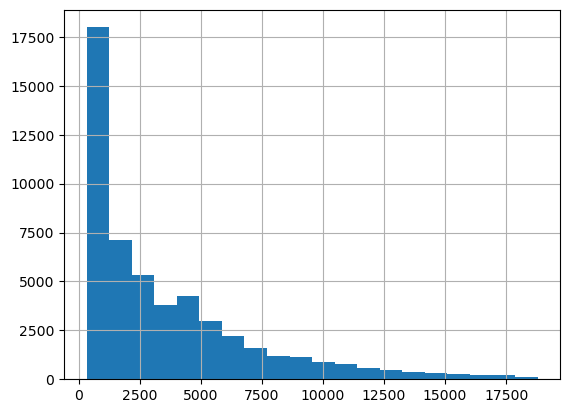

In [47]:
df['price'].hist(bins=20)

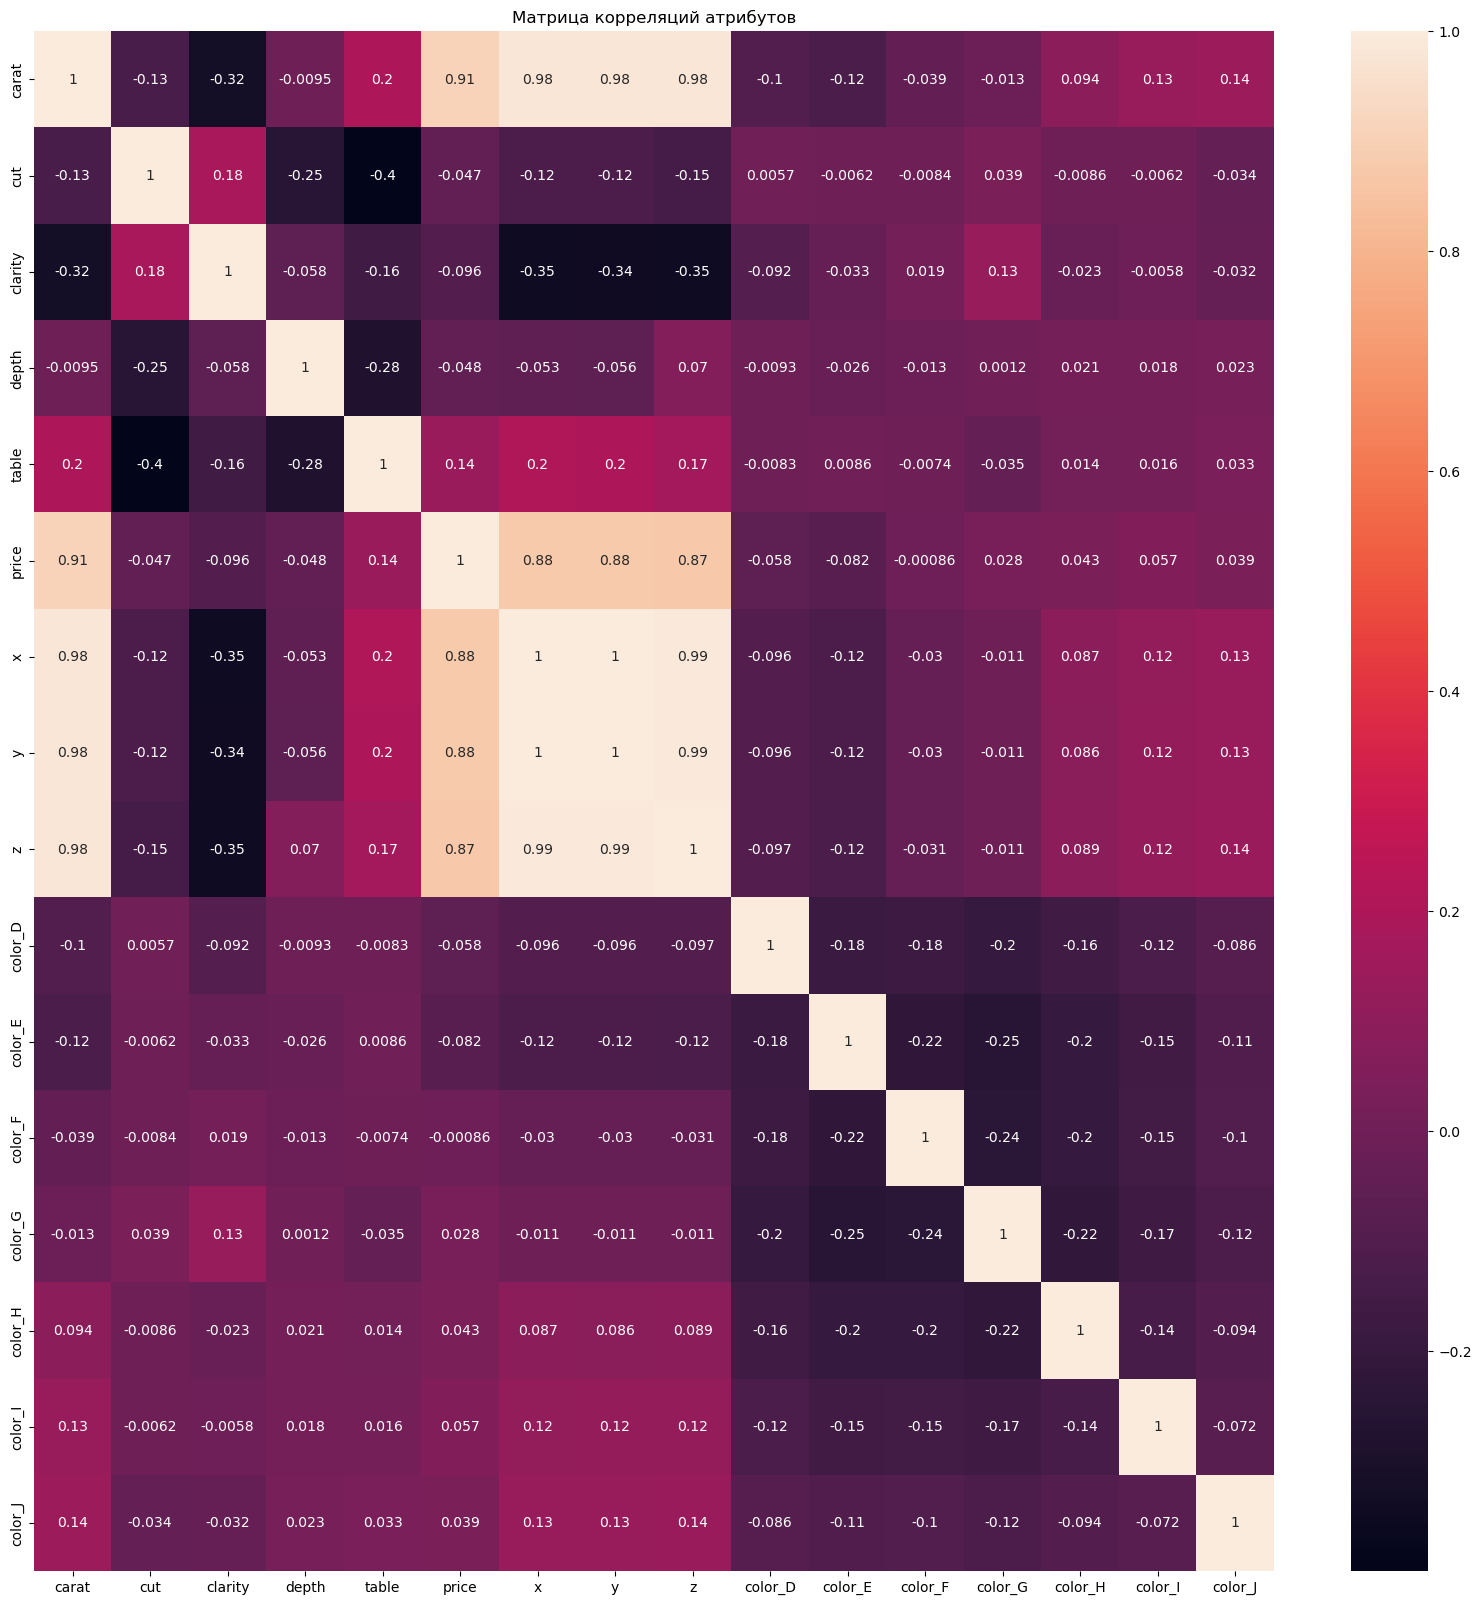

In [48]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.title('Матрица корреляций атрибутов')
plt.show()

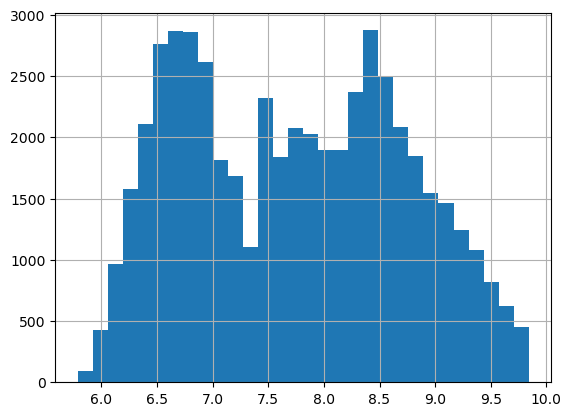

In [49]:
df['price'] = np.log(df['price'])
df.price.hist(bins=30);

# Обучение модели

In [52]:
X = df.drop(columns=['price'])

y = df['price']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train[['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z']]) 

StandardScaler()

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36282 entries, 12399 to 45577
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    36282 non-null  float64
 1   cut      36282 non-null  int64  
 2   clarity  36282 non-null  int64  
 3   depth    36282 non-null  float64
 4   table    36282 non-null  float64
 5   x        36282 non-null  float64
 6   y        36282 non-null  float64
 7   z        36282 non-null  float64
 8   color_D  36282 non-null  bool   
 9   color_E  36282 non-null  bool   
 10  color_F  36282 non-null  bool   
 11  color_G  36282 non-null  bool   
 12  color_H  36282 non-null  bool   
 13  color_I  36282 non-null  bool   
 14  color_J  36282 non-null  bool   
dtypes: bool(7), float64(6), int64(2)
memory usage: 2.7 MB


In [65]:
X_train_sc = scaler.transform(X_train[['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z']])
X_test_sc = scaler.transform(X_test[['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z']])

In [68]:
X_train[['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z']] = X_train_sc
X_test[['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z']] = X_test_sc

In [70]:
from sklearn.linear_model import LinearRegression
# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [73]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [71]:
from sklearn import metrics
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [75]:
print_metrics(y_test, y_pred_regr)

MAE: 393.45307245816804
RMSE: 735.5276870631033
R2: 0.9792587823640382
MAPE: 1.432068896212848


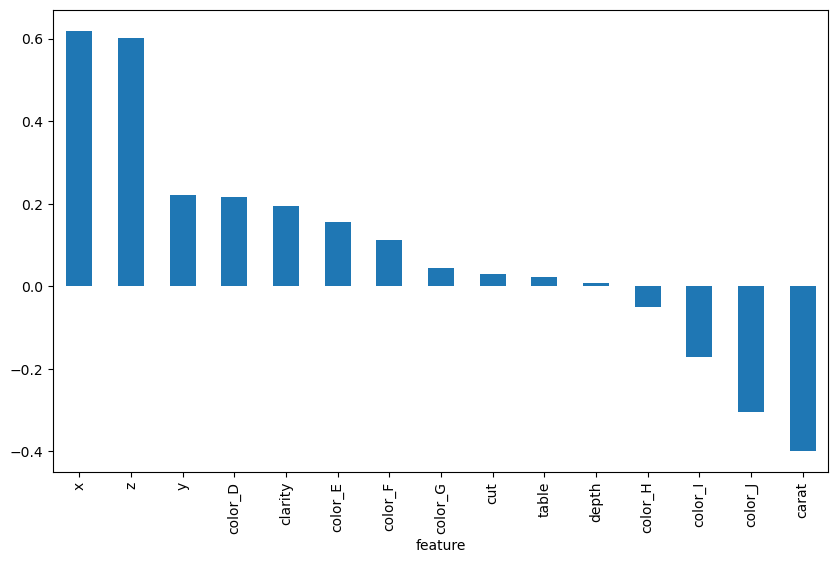

In [77]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [79]:
from sklearn.model_selection import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


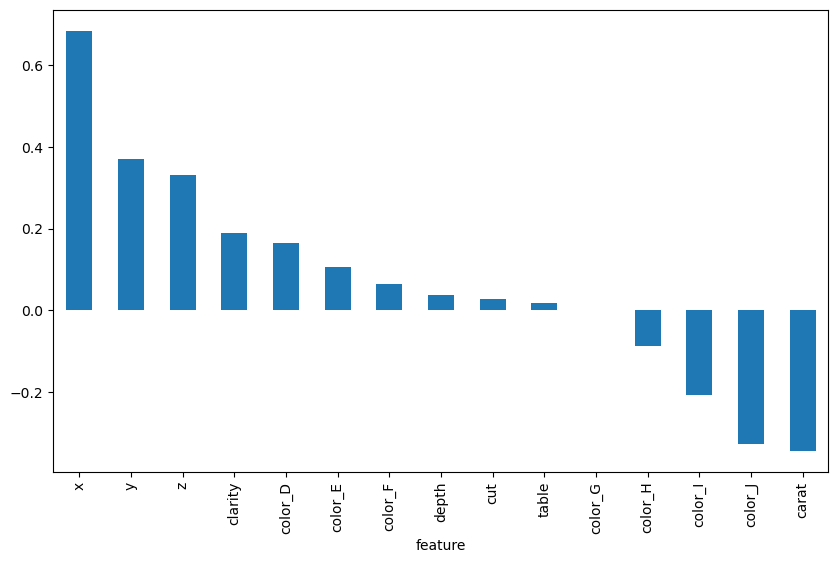

In [82]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [84]:
print_metrics(y_test, y_pred_lasso)

MAE: 400.0904298526137
RMSE: 758.5561893650089
R2: 0.9790614734651476
MAPE: 1.4397675435579216
